# Coding Exeriese

- the data has been explored in csv format
- have used statmodel & sklearn based approach
- the predictive analysis model has error

## Loading all the required libraries

In [1]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import scipy.io as sio
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 
from statsmodels.graphics.gofplots import qqplot
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from resample import permutation, bootstrap, utils

## Data

- load the data and view the data

In [2]:
data = pd.read_csv("./data.csv")
data.head()

,date,Quater,gdp,consumption,invest,government,dpi,cpi,m1,tbill,unemp,population,inflation,interest
0,1950,Q1,1610.5,1058.9,198.1,361.0,1186.1,70.6,110.20,1.12,6.4,149.461,NaN,NaN
1,1950,Q2,1658.8,1075.9,220.4,366.4,1178.1,71.4,111.75,1.17,5.6,150.260,4.5071,-3.3404
2,1950,Q3,1723.0,1131.0,239.7,359.6,1196.5,73.2,112.95,1.23,4.6,151.064,9.9590,-8.7290
3,1950,Q4,1753.9,1097.6,271.8,382.5,1210.0,74.9,113.93,1.35,4.2,151.871,9.1834,-7.8301
4,1951,Q1,1773.5,1122.8,242.9,421.9,1207.9,77.3,115.08,1.40,3.5,152.393,12.6160,-11.2160


## creating independent and depentent variable

In [3]:
X = data.loc[:, ["dpi", "unemp"]]
X.head()

,dpi,unemp
0,1186.1,6.4
1,1178.1,5.6
2,1196.5,4.6
3,1210.0,4.2
4,1207.9,3.5


In [4]:
y = data.loc[:,["consumption"]]
y.head()

,consumption
0,1058.9
1,1075.9
2,1131.0
3,1097.6
4,1122.8


## Taking the first difference

- check the api for first difference
- dropping the NaN values (first row)

## Independent values X_new

In [5]:
X_new= X.diff()
X_new = X_new.dropna()
X_new.head()

,dpi,unemp
1,-8.0,-0.8
2,18.4,-1.0
3,13.5,-0.4
4,-2.1,-0.7
5,17.9,-0.4


## dependent values Y_new

In [6]:
y_new = y.diff()
y_new = y_new.dropna()
y_new.head()

,consumption
1,17.0
2,55.1
3,-33.4
4,25.2
5,-31.4


## Computing the correlation between two independent variables (DPI & Unemp)

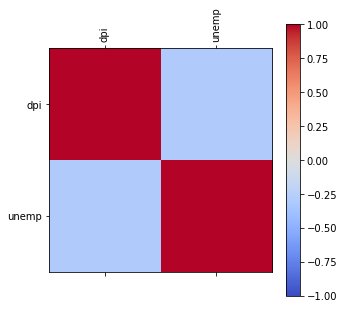

            dpi     unemp
dpi    1.000000 -0.295534
unemp -0.295534  1.000000


In [7]:
corr = X_new.corr()
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(X.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(X.columns)
ax.set_yticklabels(X.columns)
plt.show()

print(corr)

## Visualization of RAW data for varibles : DPI & Unemp vs Date

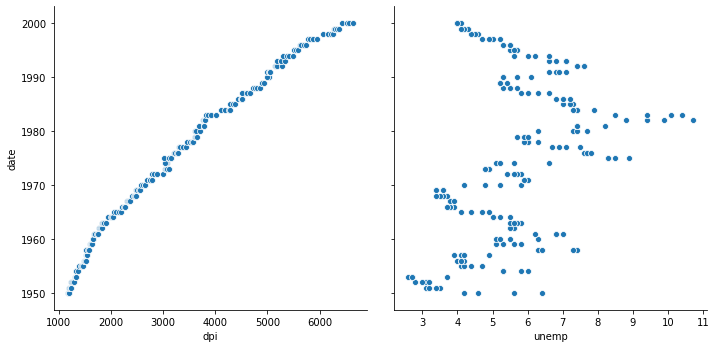

In [8]:
sns.pairplot(data, x_vars=['dpi','unemp'], y_vars='date', height=5, aspect=1)

## creating new data frame

- Adding constant to the new data frame 

In [9]:
df = sm.add_constant(X_new)
df.head()

/home/saif/anaconda3/envs/myclone1/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,const,dpi,unemp
1,1.0,-8.0,-0.8
2,1.0,18.4,-1.0
3,1.0,13.5,-0.4
4,1.0,-2.1,-0.7
5,1.0,17.9,-0.4


In [10]:
df['consumption'] = y_new['consumption']
df.head()

,const,dpi,unemp,consumption
1,1.0,-8.0,-0.8,17.0
2,1.0,18.4,-1.0,55.1
3,1.0,13.5,-0.4,-33.4
4,1.0,-2.1,-0.7,25.2
5,1.0,17.9,-0.4,-31.4


## scatter plot for dpi/unemp vs Consumption

## Data Visualization after first difference

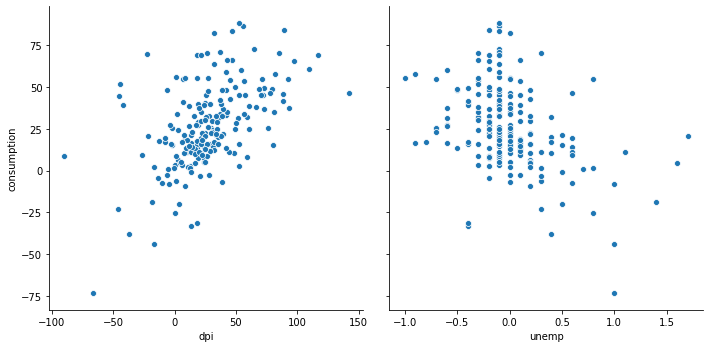

In [11]:
sns.pairplot(df, x_vars=['dpi','unemp'], y_vars='consumption', height=5, aspect=1)

# Task 1 : Fitting the model to equation:Linear Regression 

\begin{align}
    D(Consumption) = \alpha + \beta_1 * D(dpi) + \beta_2 * D(Unemp)
\end{align}

### Linear Regression from Statsmodel libraries would be used for fitting model

In [12]:
lm1 = smf.ols(formula='consumption ~ dpi + unemp', data=df).fit()

## Regenerating the reports

In [13]:
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            consumption   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.328
Method:                 Least Squares   F-statistic:                     50.31
Date:                Fri, 24 Jan 2020   Prob (F-statistic):           2.00e-18
Time:                        10:52:51   Log-Likelihood:                -898.12
No. Observations:                 203   AIC:                             1802.
Df Residuals:                     200   BIC:                             1812.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     16.2848      1.911      8.522      0.000      12.517      20.053
dpi            0.3557      0.048      7.444      0.000       0.261       0.450
unemp        -16.0149      3.792     -4.223      0.000     -23.493      -8.537
==============================================================================
Omnibus:                       12.022   Durbin-Watson:                   1.767
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               14.257
Skew:                           0.459   Prob(JB):                     0.000802
Kurtosis:                       3.919   Cond. No.                         110.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## probabilities

In [14]:
lm1.pvalues

Intercept    3.785079e-15
dpi          2.844072e-12
unemp        3.656540e-05
dtype: float64

## Standard Error

In [15]:
print(lm1.bse)

Intercept    1.910841
dpi          0.047779
unemp        3.792157
dtype: float64


## predicting the values

In [16]:
predictions_lm1 = lm1.predict(X_new)

## Evaluating the accuracy of the regression.

this is done by 
- R2
- MSE errror
- RMSE

In [17]:
# mean squared error
mse = np.sum((df['consumption'] - predictions_lm1)**2)

# root mean squared error
rmse = np.sqrt(mse/len(df['consumption']))

print('R2 : ', lm1.rsquared)
print('MSE: ', mse)
print('RMSE:', rmse)

R2 :  0.33470312951307557
MSE:  82767.10416466574
RMSE: 20.192070843504197


## Visualization of fitted values against independent values

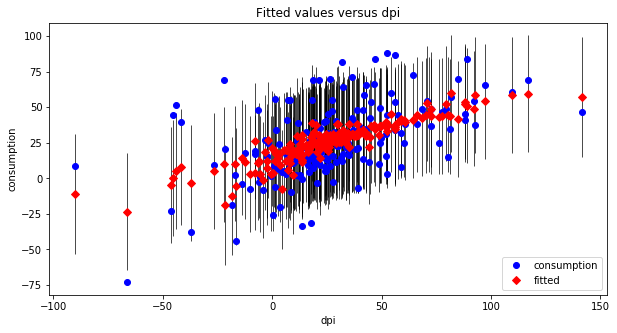

In [18]:
fig, ax = plt.subplots(figsize=(10, 5))
fig = sm.graphics.plot_fit(lm1, "dpi", ax=ax)
plt.legend(loc='lower right')

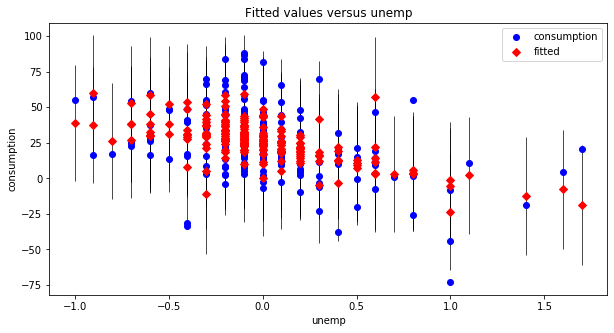

In [19]:
fig, ax = plt.subplots(figsize=(10, 5))
fig = sm.graphics.plot_fit(lm1, "unemp", ax=ax)

## residuals vs fitted values

- using statsmodel
- to check the linear correlation between dependent variable and independent variables

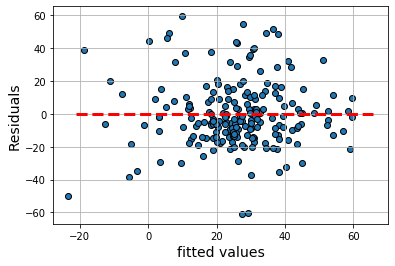

In [20]:
plt.scatter(lm1.fittedvalues, lm1.resid,edgecolor='k')
xmin=min(lm1.fittedvalues)
xmax = max(lm1.fittedvalues)
plt.hlines(y=0,xmin=xmin*0.9,xmax=xmax*1.1,color='red',linestyle='--',lw=3)
plt.xlabel('fitted values',fontsize=14)
plt.ylabel('Residuals',fontsize=14)
plt.grid(True)
plt.show()

## Histogram of normalized residuals

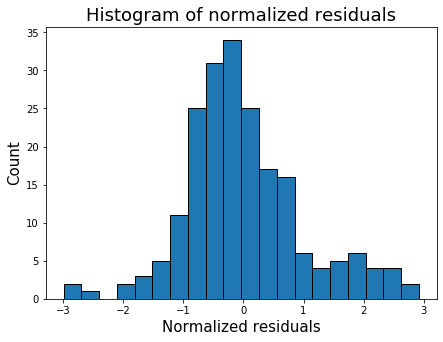

In [21]:
plt.figure(figsize=(7,5))
plt.hist(lm1.resid_pearson,bins=20,edgecolor='k')
plt.ylabel('Count',fontsize=15)
plt.xlabel('Normalized residuals',fontsize=15)
plt.title("Histogram of normalized residuals",fontsize=18)
plt.show()

## Q-Q plot

<Figure size 576x360 with 0 Axes>

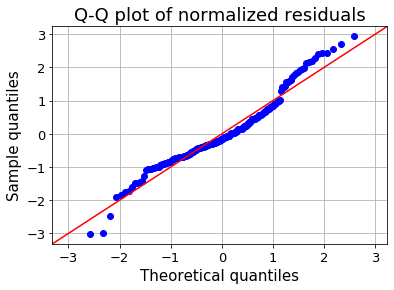

In [22]:
plt.figure(figsize=(8,5))
fig=qqplot(lm1.resid_pearson,line='45',fit='True')
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel("Theoretical quantiles",fontsize=15)
plt.ylabel("Sample quantiles",fontsize=15)
plt.title("Q-Q plot of normalized residuals",fontsize=18)
plt.grid(True)
plt.show()

# Task 2 : Outlier detection

## Using Tukey method

\begin{align}
    [Q_{0.25} * (x) - 1.5 * IQR,Q_{0.75} * (x) + 1.5 * IQR]
\end{align}


In [23]:
Q1 = lm1.resid.quantile(0.25)
Q3 = lm1.resid.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

22.396772195523187


In [24]:
resi_error = lm1.resid
lm1.resid.shape

(203,)

In [25]:
print((lm1.resid < (Q1 - 1.5 * IQR))|(lm1.resid > (Q3 + 1.5 * IQR)))

1      False
2      False
3       True
4      False
5       True
       ...  
199     True
200     True
201    False
202    False
203    False
Length: 203, dtype: bool


## removing the outliers

In [26]:
resi_error = resi_error[~((resi_error < (Q1 - 1.5 * IQR))|(resi_error > (Q3 + 1.5 * IQR)))]

## Shape of resi_error

In [27]:
resi_error.shape

(191,)

## creating new dataframe by removing the outliers from the source data X1_new & df

In [28]:
X1_new = X_new[~((lm1.resid < (Q1 - 1.5 * IQR))|(lm1.resid > (Q3 + 1.5 * IQR)))]

In [29]:
df1_new = df[~((lm1.resid < (Q1 - 1.5 * IQR))|(lm1.resid > (Q3 + 1.5 * IQR)))]

## Number of outliers

In [30]:
fals_X1 = X_new[((lm1.resid < (Q1 - 1.5 * IQR))|(lm1.resid > (Q3 + 1.5 * IQR)))]

In [31]:
len(fals_X1)

12

## fitting the model again on revised data

- the outliers has been removed and LR has been performed agained

In [32]:
lm2 = smf.ols(formula='consumption ~ dpi + unemp', data=df1_new).fit()

In [33]:
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            consumption   R-squared:                       0.430
Model:                            OLS   Adj. R-squared:                  0.424
Method:                 Least Squares   F-statistic:                     70.90
Date:                Fri, 24 Jan 2020   Prob (F-statistic):           1.14e-23
Time:                        10:57:12   Log-Likelihood:                -803.04
No. Observations:                 191   AIC:                             1612.
Df Residuals:                     188   BIC:                             1622.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     14.6840      1.642      8.944      0.000      11.445      17.923
dpi            0.3614      0.041      8.842      0.000       0.281       0.442
unemp        -15.9717      3.146     -5.077      0.000     -22.178      -9.765
==============================================================================
Omnibus:                        9.505   Durbin-Watson:                   1.821
Prob(Omnibus):                  0.009   Jarque-Bera (JB):                9.507
Skew:                           0.528   Prob(JB):                      0.00862
Kurtosis:                       3.283   Cond. No.                         111.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## probabilities

In [34]:
lm1.pvalues

Intercept    3.785079e-15
dpi          2.844072e-12
unemp        3.656540e-05
dtype: float64

## Standard Error

In [35]:
print(lm1.bse)

Intercept    1.910841
dpi          0.047779
unemp        3.792157
dtype: float64


In [36]:
predictions_lm2 = lm2.predict(X1_new)

In [37]:
# mean squared error
mse = np.sum((df1_new['consumption'] - predictions_lm2)**2)

# root mean squared error
# m is the number of training examples
rmse = np.sqrt(mse/len(lm2.resid))

print('R2 : ', lm2.rsquared)
print('MSE: ', mse)
print('RMSE:', rmse)

R2 :  0.4299464569815873
MSE:  50171.13649797016
RMSE: 16.207285624657064


## residuals vs fitted values

- to check the linear correlation between dependent variable and independent variables

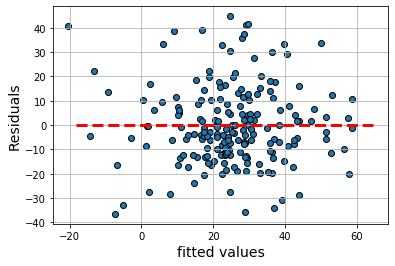

In [38]:
plt.scatter(lm2.fittedvalues, lm2.resid,edgecolor='k')
xmin=min(lm2.fittedvalues)
xmax = max(lm2.fittedvalues)
plt.hlines(y=0,xmin=xmin*0.9,xmax=xmax*1.1,color='red',linestyle='--',lw=3)
plt.xlabel('fitted values',fontsize=14)
plt.ylabel('Residuals',fontsize=14)
plt.grid(True)
plt.show()

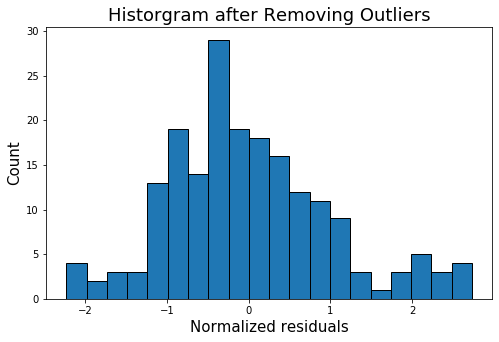

In [39]:
plt.figure(figsize=(8,5))
plt.hist(lm2.resid_pearson,bins=20,edgecolor='k')
plt.ylabel('Count',fontsize=15)
plt.xlabel('Normalized residuals',fontsize=15)
plt.title("Historgram after Removing Outliers",fontsize=18)
plt.show()

<Figure size 576x360 with 0 Axes>

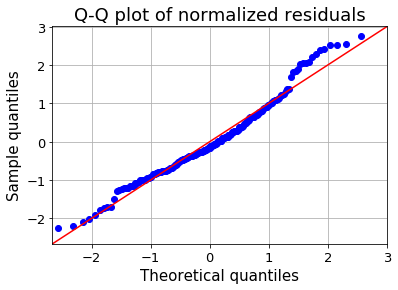

In [40]:
plt.figure(figsize=(8,5))
fig=qqplot(lm2.resid_pearson,line='45',fit='True')
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel("Theoretical quantiles",fontsize=15)
plt.ylabel("Sample quantiles",fontsize=15)
plt.title("Q-Q plot of normalized residuals",fontsize=18)
plt.grid(True)
plt.show()

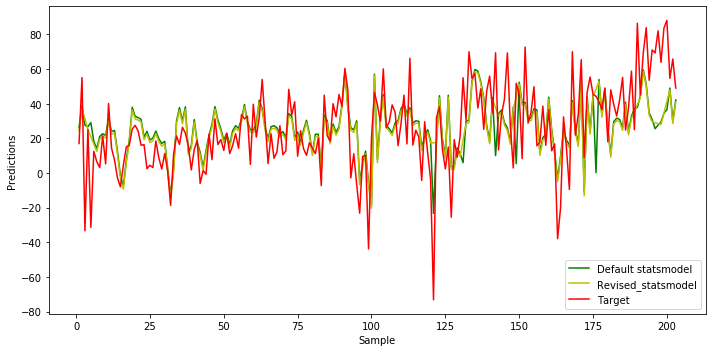

In [41]:
fig = plt.figure(figsize=(10, 5))
# plt.plot(predictions,'-b',label='sklearn')
plt.plot(predictions_lm1, '-g',label='Default statsmodel')
plt.plot(predictions_lm2,'-y',label='Revised_statsmodel')
plt.plot(y_new['consumption'], '-r',label='Target')  
plt.xlabel('Sample')
plt.ylabel('Predictions')
fig.tight_layout()
plt.legend(loc='lower right')
plt.show()

# Task 3 : Autocorrelation of Residuals using Durbin-Watson (DW) statistic of the residuals

- DW on default values: **1.76**
- DW after removing the outliers: **1.82**



## Answer:

- the DW values increases from (significantly less) towards 2, which significes that there is no correlation between two independent variables.

In [42]:
def durbin_watson_new(resids, axis=0):
    resids = np.asarray(resids)
    diff_resids = np.diff(resids, 1, axis=axis)
    dw = np.sum(diff_resids**2, axis=axis) / np.sum(resids**2, axis=axis)
    return dw

### DW for default data source 

In [43]:
durbin_watson_new(lm1.resid)

1.7670963731441405

### DW for default Revised data source (after removing the outliers) 

In [44]:
durbin_watson_new(lm2.resid)

1.8213485592304108

# Task 4 : Bootstrapping of Standard Errors

- this has been carried out on linear regression from **sklearn library**

In [45]:
def fitreg(A):
    reg = LinearRegression(fit_intercept=True)
    X_local = A[:,1:3]
    Y_local = A[:,3]
    reg.fit(X_local,Y_local)
    params = np.append(reg.intercept_,reg.coef_)
    predictions = reg.predict(X_local)

    newX = pd.DataFrame({"Constant":np.ones(len(X_local))}).join(pd.DataFrame(X_local))
    newX = newX.dropna()
    MSE = (sum((Y_local-predictions)**2))/(len(newX)-len(newX.columns))

    # Note if you don't want to use a DataFrame replace the two lines above with
    # newX = np.append(np.ones((len(X),1)), X, axis=1)
    # MSE = (sum((y-predictions)**2))/(len(newX)-len(newX[0]))

    var_b = MSE*(np.linalg.inv(np.dot(newX.T,newX)).diagonal())
    sd_b = np.sqrt(var_b)
    ts_b = params/ sd_b

    p_values =[2*(1-stats.t.cdf(np.abs(i),(len(newX)-1))) for i in ts_b]

    sd_b = np.round(sd_b,3)
    ts_b = np.round(ts_b,3)
    p_values = np.round(p_values,3)
    params = np.round(params,4)

    myDF3 = pd.DataFrame()
    myDF3["Coefficients"],myDF3["Standard Errors"],myDF3["t values"],myDF3["Probabilites"] = [params,sd_b,ts_b,p_values]
    # print(myDF3)
    return {"coef": reg.coef_, "intercept": reg.intercept_, "std_error":sd_b}

## on default data (without removing the outliers)

In [46]:
boot_coef_def = bootstrap.bootstrap(a=df.values, f=fitreg, b=10000)
boot_coef_def[:3]

array([{'coef': array([  0.37165675, -10.74198043]), 'intercept': 18.11051724536124, 'std_error': array([2.087, 0.051, 3.946])},
       {'coef': array([  0.32003064, -14.23195937]), 'intercept': 17.15358086286578, 'std_error': array([2.056, 0.048, 4.558])},
       {'coef': array([  0.3692769 , -13.40363485]), 'intercept': 17.49884771109659, 'std_error': array([2.034, 0.051, 4.142])}],
      dtype=object)

In [47]:
len(df)

203

In [48]:
param_frame_def = pd.DataFrame([pd.Series(x) for x in boot_coef_def])
param_frame_def.head()

,coef,intercept,std_error
0,"[0.3716567465403763, -10.741980429334106]",18.110517,"[2.087, 0.051, 3.946]"
1,"[0.3200306365122572, -14.231959369611271]",17.153581,"[2.056, 0.048, 4.558]"
2,"[0.3692769019866186, -13.403634846806911]",17.498848,"[2.034, 0.051, 4.142]"
3,"[0.34190608282091717, -12.432195292220625]",16.635692,"[1.887, 0.055, 3.728]"
4,"[0.38626262422208024, -17.80872682990135]",16.239918,"[1.96, 0.047, 3.754]"


In [49]:
Std_ErrorBT_def = pd.DataFrame()
Std_ErrorBT_def['SE_intercept'] = param_frame_def["std_error"].map(lambda x: x[0])
Std_ErrorBT_def['SE_dpi'] = param_frame_def["std_error"].map(lambda x: x[1])
Std_ErrorBT_def['SE_unemp'] = param_frame_def["std_error"].map(lambda x: x[2])
Std_ErrorBT_def.head()

,SE_intercept,SE_dpi,SE_unemp
0,2.087,0.051,3.946
1,2.056,0.048,4.558
2,2.034,0.051,4.142
3,1.887,0.055,3.728
4,1.960,0.047,3.754


In [50]:
print('Median StdError: DPI: ', Std_ErrorBT_def.SE_dpi.median())
print('Median StdError: Unemp: ', Std_ErrorBT_def.SE_unemp.median())
print('Median StdError: intercept: ', Std_ErrorBT_def.SE_intercept.median())
print('--------------------------------------------')
print('Mean StdError: DPI: ', Std_ErrorBT_def.SE_dpi.mean())
print('Mean StdError: Unemp: ', Std_ErrorBT_def.SE_unemp.mean())
print('Mean StdError: intercept: ', Std_ErrorBT_def.SE_intercept.mean())

Median StdError: DPI:  0.048
Median StdError: Unemp:  3.795
Median StdError: intercept:  1.905
--------------------------------------------
Mean StdError: DPI:  0.04791610000000001
Mean StdError: Unemp:  3.8123485999999995
Mean StdError: intercept:  1.9072242999999998


In [51]:
Std_ErrorBT_def.describe()

,SE_intercept,SE_dpi,SE_unemp
count,10000.000000,10000.000000,10000.000000
mean,1.907224,0.047916,3.812349
std,0.131288,0.004504,0.368713
min,1.445000,0.033000,2.605000
25%,1.818000,0.045000,3.558000
50%,1.905000,0.048000,3.795000
75%,1.996000,0.051000,4.041000
max,2.387000,0.068000,5.320000


## 95% condifence interval on 

- intercept
- dpi
- unemp

In [52]:
q_intercept_def = utils.eqf(Std_ErrorBT_def['SE_intercept'])
(q_intercept_def(0.025), q_intercept_def(0.975))

(1.658, 2.174)

In [53]:
q_dpi_def = utils.eqf(Std_ErrorBT_def['SE_dpi'])
(q_dpi_def(0.025), q_dpi_def(0.975))

(0.04, 0.057)

In [54]:
q_unemp_def = utils.eqf(Std_ErrorBT_def['SE_unemp'])
(q_unemp_def(0.025), q_unemp_def(0.975))

(3.15, 4.601)

## On revised data after removing the outliers

In [55]:
boot_coef = bootstrap.bootstrap(a=df1_new.values, f=fitreg, b=10000)
boot_coef[:3]

array([{'coef': array([  0.29300088, -20.56997017]), 'intercept': 18.396796036717028, 'std_error': array([1.604, 0.043, 3.347])},
       {'coef': array([  0.37580301, -14.62656243]), 'intercept': 13.795948869665255, 'std_error': array([1.609, 0.038, 3.196])},
       {'coef': array([  0.36805528, -15.54725881]), 'intercept': 14.409008010433194, 'std_error': array([1.592, 0.038, 2.986])}],
      dtype=object)

In [56]:
boot_coef.shape

(10000,)

In [57]:
param_frame = pd.DataFrame([pd.Series(x) for x in boot_coef])
param_frame.head()

,coef,intercept,std_error
0,"[0.2930008790677304, -20.569970172985578]",18.396796,"[1.604, 0.043, 3.347]"
1,"[0.3758030055864629, -14.62656243198084]",13.795949,"[1.609, 0.038, 3.196]"
2,"[0.36805527944978567, -15.547258811194634]",14.409008,"[1.592, 0.038, 2.986]"
3,"[0.3813353857830116, -17.044944131797976]",14.643854,"[1.438, 0.033, 2.739]"
4,"[0.4186953348300375, -17.042802443551736]",12.046472,"[1.825, 0.046, 3.34]"


In [58]:
Std_ErrorBT = pd.DataFrame()
Std_ErrorBT['SE_intercept'] = param_frame["std_error"].map(lambda x: x[0])
Std_ErrorBT['SE_dpi'] = param_frame["std_error"].map(lambda x: x[1])
Std_ErrorBT['SE_unemp'] = param_frame["std_error"].map(lambda x: x[2])
Std_ErrorBT.head()

,SE_intercept,SE_dpi,SE_unemp
0,1.604,0.043,3.347
1,1.609,0.038,3.196
2,1.592,0.038,2.986
3,1.438,0.033,2.739
4,1.825,0.046,3.340


In [59]:
print('Median StdError: DPI: ', Std_ErrorBT.SE_dpi.median())
print('Median StdError: Unemp: ', Std_ErrorBT.SE_unemp.median())
print('Median StdError: intercept: ', Std_ErrorBT.SE_intercept.median())
print('--------------------------------------------')
print('Mean StdError: DPI: ', Std_ErrorBT.SE_dpi.mean())
print('Mean StdError: Unemp: ', Std_ErrorBT.SE_unemp.mean())
print('Mean StdError: intercept: ', Std_ErrorBT.SE_intercept.mean())

Median StdError: DPI:  0.041
Median StdError: Unemp:  3.146
Median StdError: intercept:  1.637
--------------------------------------------
Mean StdError: DPI:  0.0410617
Mean StdError: Unemp:  3.1662574
Mean StdError: intercept:  1.6403708


In [60]:
Std_ErrorBT.describe()

,SE_intercept,SE_dpi,SE_unemp
count,10000.000000,10000.000000,10000.000000
mean,1.640371,0.041062,3.166257
std,0.115361,0.004095,0.302625
min,1.279000,0.029000,2.290000
25%,1.560000,0.038000,2.955000
50%,1.637000,0.041000,3.146000
75%,1.715000,0.044000,3.354000
max,2.146000,0.064000,4.587000


## 95% condifence interval on 

- intercept
- dpi
- unemp

In [61]:
q_intercept = utils.eqf(Std_ErrorBT['SE_intercept'])
(q_intercept(0.025), q_intercept(0.975))

(1.425, 1.877)

In [62]:
q_dpi = utils.eqf(Std_ErrorBT['SE_dpi'])
(q_dpi(0.025), q_dpi(0.975))

(0.034, 0.05)

In [63]:
q_unemp = utils.eqf(Std_ErrorBT['SE_unemp'])
(q_unemp(0.025), q_unemp(0.975))

(2.631, 3.822)